In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [21]:
x=dataset.drop('Class',axis=1)
y=dataset.Class

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
model1=StandardScaler()
model1.fit(x_train,y_train)
x_test=model1.transform(x_test)
x_train=model1.transform(x_train)

In [31]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred=model2.predict(x_test)

In [42]:
metrics.confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]], dtype=int64)

In [43]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [48]:
err=[]
for i in range(1,40):
    model3=KNeighborsClassifier(n_neighbors=i)
    model3.fit(x_train,y_train)
    y_pred1=model3.predict(x_test)
    err.append(np.mean(y_pred1 != y_test ))

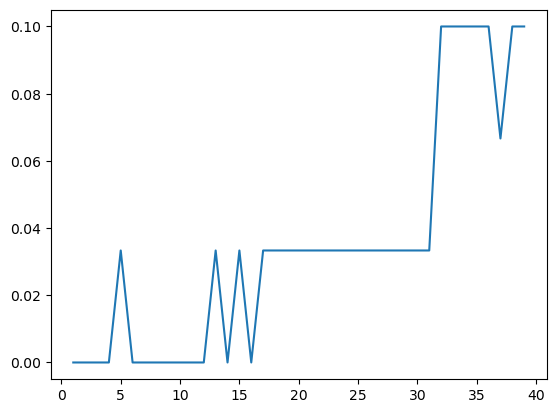

In [49]:
plt.plot(range(1,40),err)